<a href="https://colab.research.google.com/github/MugulTum/Lux_bootcamp/blob/main/Telecom_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this is a python program to predict customer churn

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#load my dataset
from google.colab import files
uploaded=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [4]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
#show the number of columns and rows
df.shape

(7043, 21)

In [7]:
#show all columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#checking missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#get customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Count of Customer Churn')

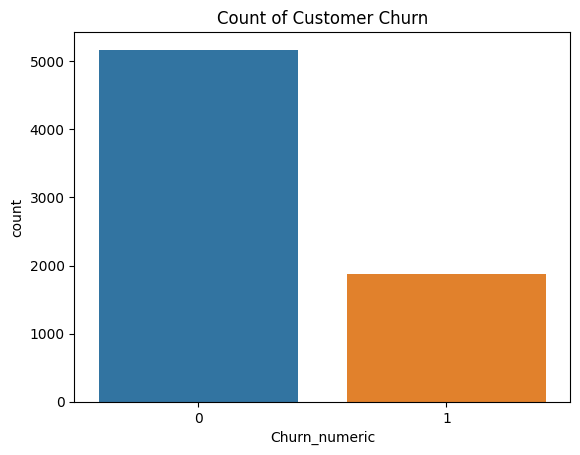

In [11]:
#visualize the count of customer churn
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})
sns.countplot(data=df, x='Churn_numeric')
plt.title("Count of Customer Churn")

In [12]:
#what is the percentage of customers leaving
num_retain = df[df.Churn=='No'].shape[0]
num_churned = df[df.Churn=='Yes'].shape[0]

#print percentage of customers that stayed
print(num_retain/(num_retain+num_churned)*100, '% of customers stayed with the company')

#print percentage of customers that left
print(num_churned/(num_retain+num_churned)*100, '% of customers left the company')

73.4630129206304 % of customers stayed with the company
26.536987079369588 % of customers left the company


<Axes: xlabel='gender', ylabel='count'>

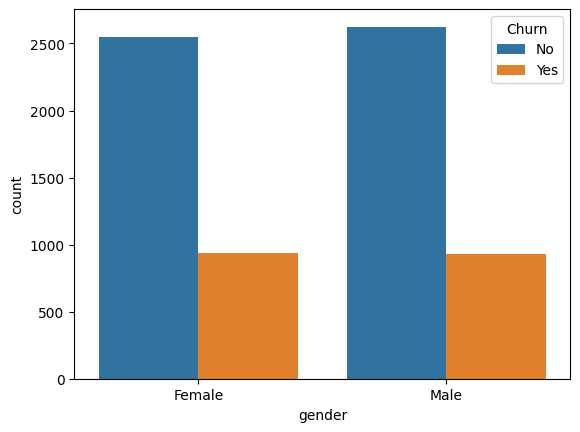

In [13]:
#churn count by gender
sns.countplot(x='gender', hue='Churn', data=df)

Text(0.5, 1.0, 'Customer churn by internet service')

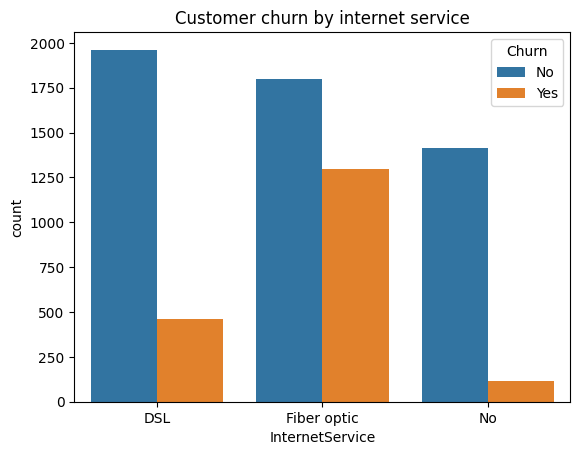

In [14]:
#visualize churn count for internet service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Customer churn by internet service")

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

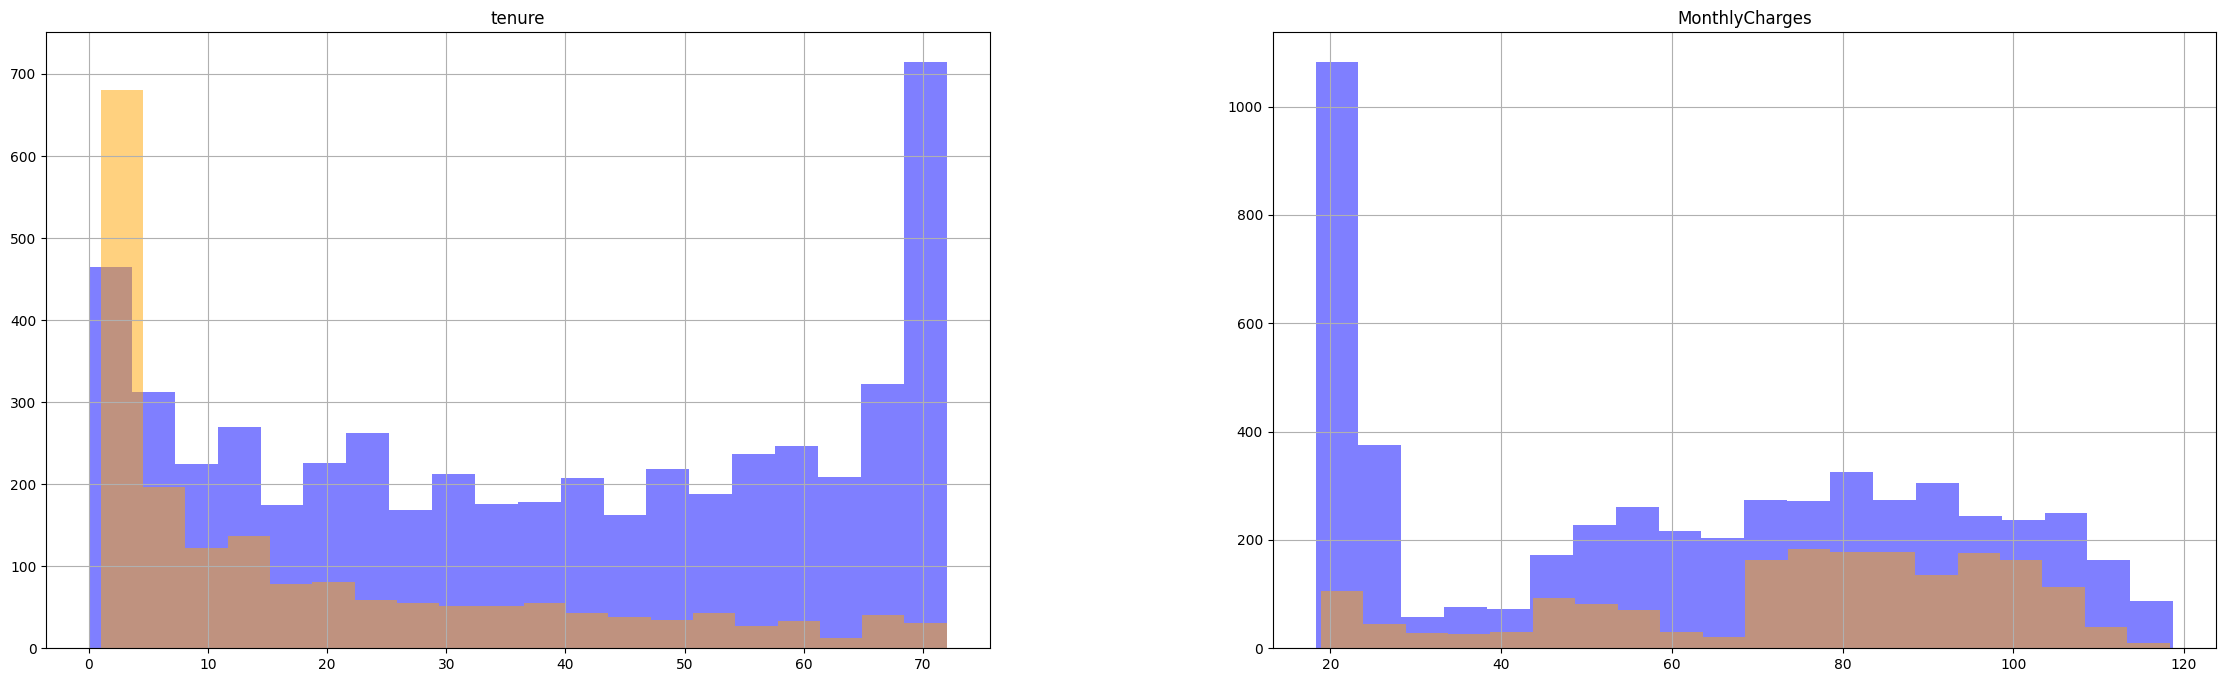

In [15]:
numerical_features=['tenure', 'MonthlyCharges']
fig, ax=plt.subplots(1, 2, figsize=(28,8))
df[df.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=20, color='Orange', alpha=0.5, ax=ax)

In [16]:
#data preprocessing
#remove columns not needed
df=df.drop(columns=["Churn_numeric"])


In [17]:
#convert non numeric columns to numeric
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-17-36d2d09936ce>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-17-36d2d09936ce>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-17-36d2d09936ce>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-17-36d2d09936ce>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-17-36d2d09936ce>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. Th

In [18]:
#show the datatypes of the new dataset
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [19]:
#show first five rows of the new dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [22]:
y=df['Churn'] #target dataset
X=df.drop('Churn', axis=1) #feature dataset

In [23]:
#split data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#feature scaling to improve model performance
X = StandardScaler().fit_transform(X)

In [26]:
#create the model
model=LogisticRegression()
#train model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#creating predictions on the test data
predictions=model.predict(X_test)

#print predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [28]:
#check the precision, recall, f1-score for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

